# Data visualization in Python workshop @ PyCon Dublin 24.10.15
Introduction based on http://ggplot.yhathq.com/ and https://pythondatalab.wordpress.com/

Tutorial on how to use ggplot in Python. ggplot is based on R's ggplot2 package.

### Note: Pressing shift-tab opens documentation of a function. Pressing tab again opens a completion window.

In [15]:
%matplotlib inline
from ggplot import *
import bokeh

## ggplot
Let's plot something. ggplot uses pandas DataFrames and contains datasets, e.g. `meat`, `diamonds`, etc. Let's take a look at a visualization of the `meat` dataset. __aes__ stands for aesthetics.

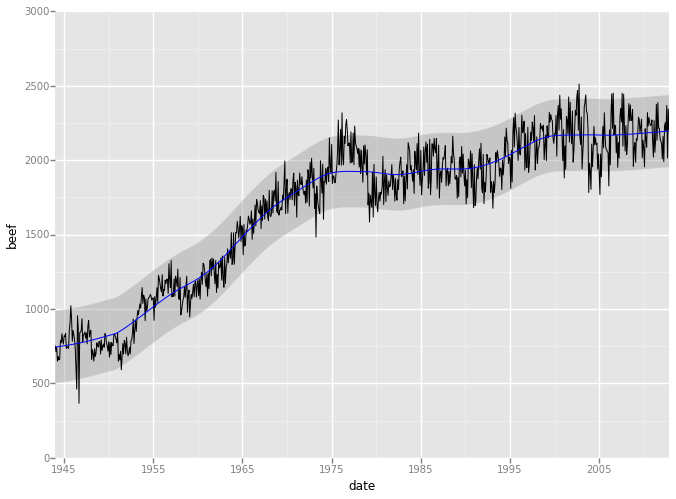

<ggplot: (8737357967853)>

In [23]:
ggplot(aes(x='date', y='beef'), data=meat) + geom_line() + stat_smooth(colour='blue', span=0.2)

Let's back-track. How did we plot the above figure? The first part of the command creates a blank canvas.

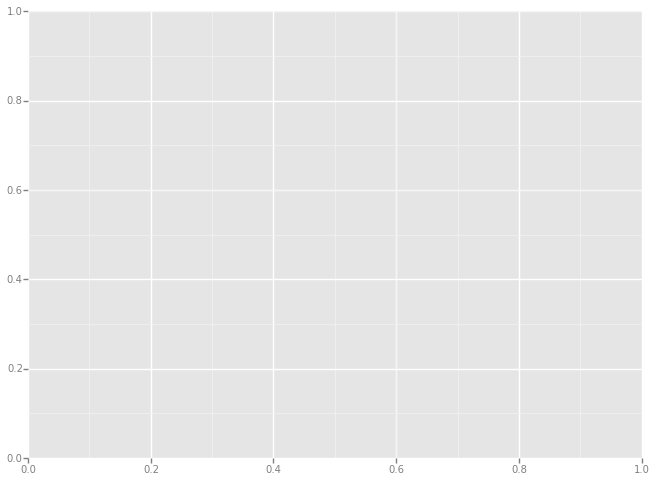

<ggplot: (8737385375785)>

In [26]:
p = ggplot(aes(x="date", y="beef"), data=meat)
p

Let's now add some points. We can set a color and the opacity (__alpha__), among other things.

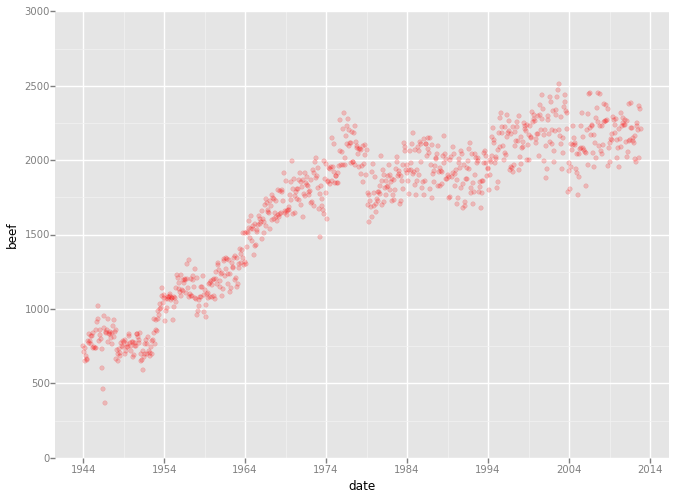

<ggplot: (8737358017997)>

In [40]:
p + geom_point(color='red', alpha=0.2)

Those are certainly some nice points. Well done. We can also add a line to those points.

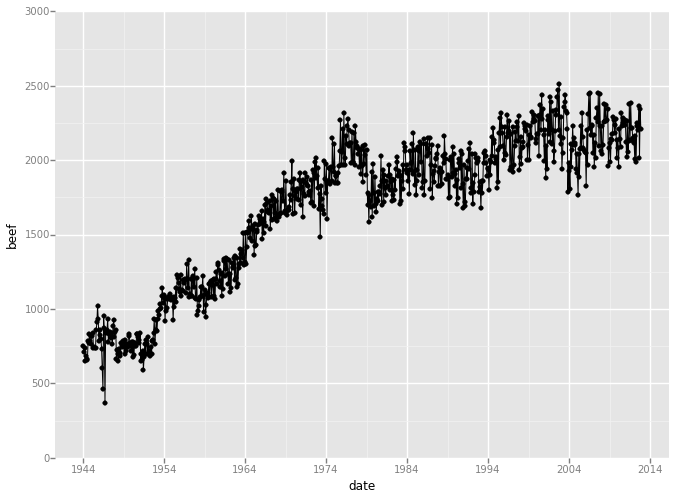

<ggplot: (8737359070973)>

In [31]:
p + geom_point() + geom_line()

Neat. Good stuff, ggplot. __geom__ are basically geometric objects that can represent subsets of observations, e.g. points, lines, etc. Let's now add a stat. When adding __stat_smooth__ a statistical interval, i.e. a trendline is calculated and drawn around our points. We can also add other things, like a title.

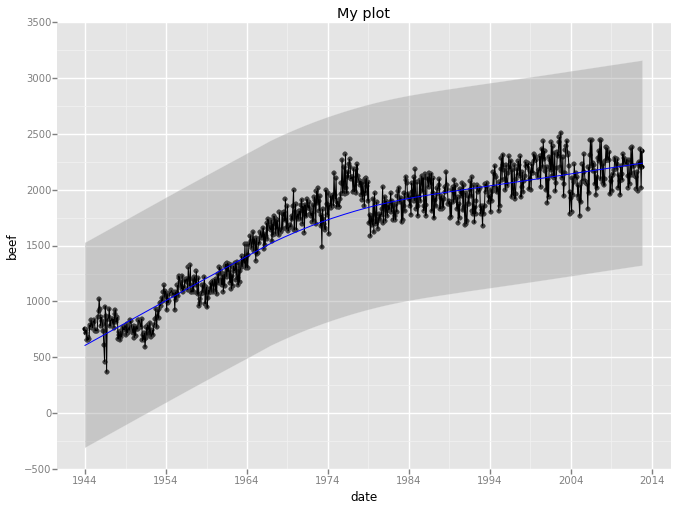

<ggplot: (8737358476101)>

In [43]:
p + geom_point() + geom_line() + stat_smooth(colour='blue') + ggtitle("My plot")

ggplot includes a basic plotting function called quick plot (`qplot`) to quickly inspect data. Let's inspect our `diamonds` dataset. Note that the default colour palette is hideous, so we are going to add a `color_brewer` from the docs. Interestingly, `color_brewer` also puts the legend in order with the graph again.

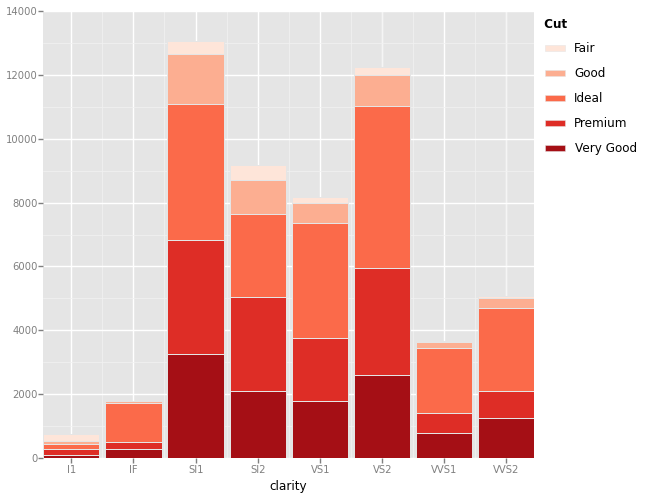

<ggplot: (8737358420645)>

In [53]:
qplot('clarity', data=diamonds, fill='cut', geom='bar') + scale_color_brewer(type='seq', palette='Reds')

We can also draw histograms.

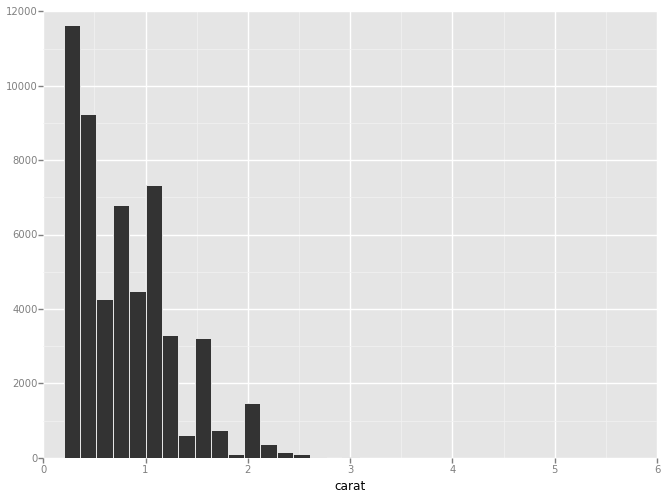

<ggplot: (8737356807917)>

In [55]:
qplot('carat', data=diamonds, geom='histogram')

`qplot` is for getting a feeling of the data, but only offers limited functionalities in comparison with ggplot. Transforming a qplot to ggplot, however, is quite straightforward. The ggplot version of our histogram is the following:

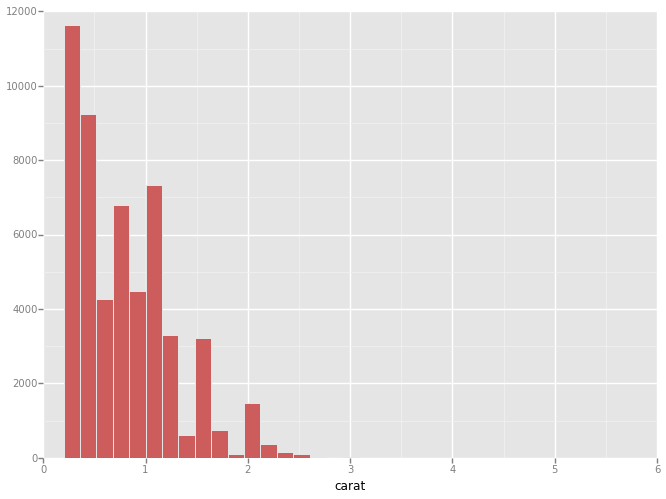

<ggplot: (8737354926861)>

In [68]:
ggplot(aes(x='carat'), data=diamonds) + geom_histogram(fill='indianred')

Currently, there are 21 different geoms available for ggplot.

You can use __faceting__ to partition a plot into a matrix of plots.

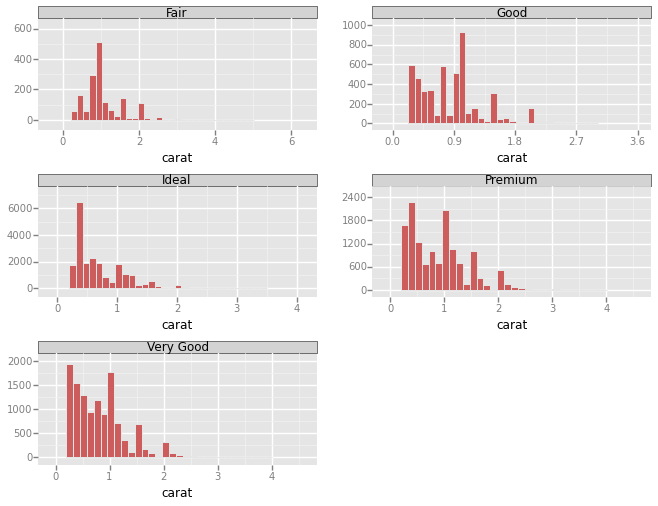

<ggplot: (8737354927093)>

In [73]:
ggplot(aes(x='carat'), data=diamonds) + geom_histogram(fill='indianred') + facet_wrap('cut')

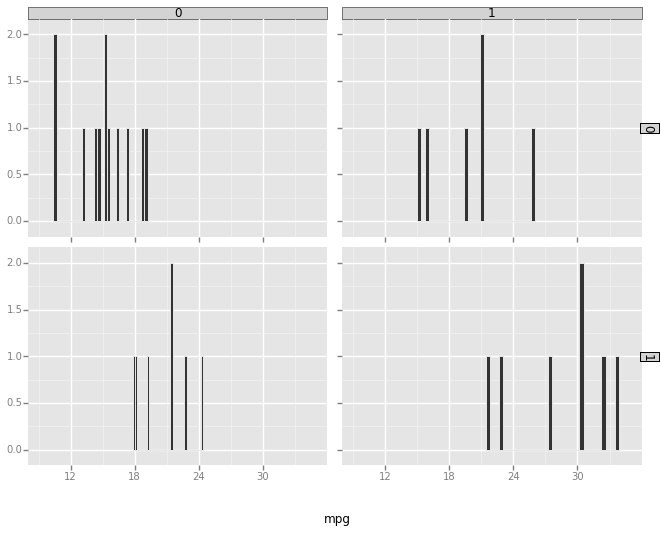

<ggplot: (8737353539569)>

In [80]:
ggplot(aes(x='mpg'), data=mtcars) + geom_histogram() + facet_grid('vs', 'am')

Let's now look at bokeh.

## bokeh
The main differentiator in contrast to ggplot is that bokeh is an __interactive__ visualization library for large datasets. First, let's import bokeh.

In [94]:
from bokeh.charts import Bar, output_file, output_notebook, show


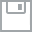
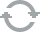
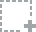
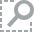
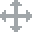
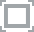
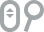
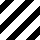
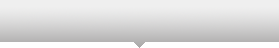
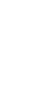
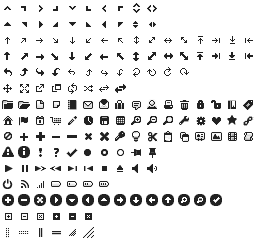
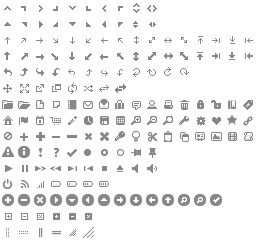
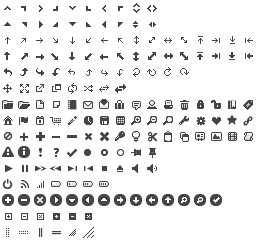
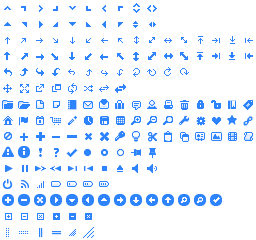
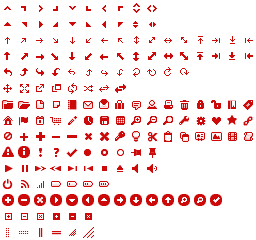
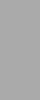
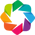
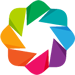

In [106]:
#use output_file to visualize it in html file
#use output_notebook to visualize it in notebook
# create a simple data set
myData = {"y": [1, 2, 3, 4, 5]}

# output to notebook
output_notebook()
# create a new line chat with a title and axis labels
p = Bar(myData, "y", title="Simple Bar Chart Example", xlabel="x", ylabel="values", width=400, height=400)
# show results
show(p)

Let's do another visualization with `scikit-learn`'s Iris dataset.


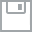
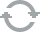
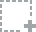
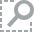
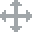
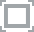
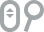
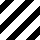
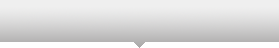
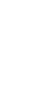
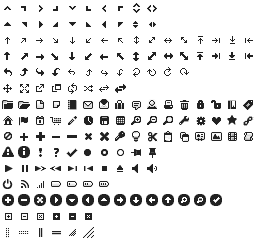
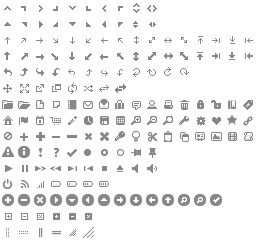
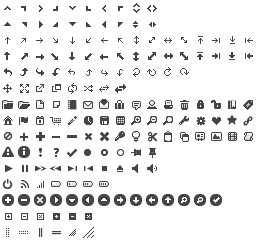
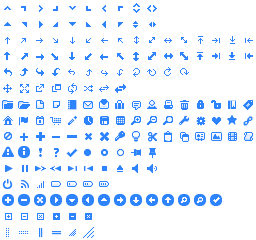
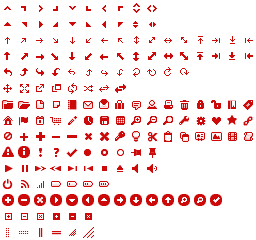
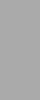
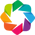
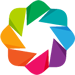

In [104]:
from sklearn.datasets import load_iris
import pandas as pd
iris = load_iris()

df = pd.DataFrame(iris.data)
df.columns = ['petal_width', 'petal_length', 'sepal_width', 'sepal_length']

# Import library
from bokeh.charts import BoxPlot
data = df[['petal_length', 'sepal_length']]

# Output to Notebook
output_notebook()

# create a new line chart with a title and axis labels
p = BoxPlot(data, 'sepal_length', xlabel='petal_length', ylabel='sepal_length', width=400, height=400)

# show the results
show(p)

### Explanation of box plot.
- Horizontal line in the middle of a column: median.
- Box around it: where > 50% of the values are.
- Red points: outliers.

In [108]:
p = BoxPlot(diamonds, values='carat', label='color', width=400, height=400)
show(p)

### Adding interactions
Based on http://bokeh.pydata.org/en/0.10.0/docs/user_guide/interaction.html#linked-brushing

In [109]:
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure, gridplot, output_file, show

output_file("brushing.html")

x = list(range(-20, 21))
y0 = [abs(xx) for xx in x]
y1 = [xx**2 for xx in x]

# create a column data source for the plots to share
source = ColumnDataSource(data=dict(x=x, y0=y0, y1=y1))

TOOLS = "box_select,lasso_select,help"

# create a new plot and add a renderer
left = figure(tools=TOOLS, width=300, height=300, title=None)
left.circle('x', 'y0', source=source)

# create another new plot and add a renderer
right = figure(tools=TOOLS, width=300, height=300, title=None)
right.circle('x', 'y1', source=source)

p = gridplot([[left, right]])

show(p)